In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv('train.csv', index_col = 'datetime', parse_dates = True)
df

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption
datetime,,,,,,,
2013-07-01 00:00:00,0,-11.4,-17.1,1003.0,571.910,A,216.0
2013-07-01 01:00:00,1,-12.1,-19.3,996.0,575.040,A,210.0
2013-07-01 02:00:00,2,-12.9,-20.0,1000.0,578.435,A,225.0
2013-07-01 03:00:00,3,-11.4,-17.1,995.0,582.580,A,216.0
2013-07-01 04:00:00,4,-11.4,-19.3,1005.0,586.600,A,222.0
...,...,...,...,...,...,...,...
2017-06-23 19:00:00,34891,-0.7,-15.0,1009.0,51.685,A,225.0
2017-06-23 20:00:00,34892,-2.9,-11.4,1005.0,56.105,A,213.0
2017-06-23 21:00:00,34893,-1.4,-12.9,995.0,61.275,A,213.0


### Changing var2 from letters to numbers

In [3]:
enc = OrdinalEncoder()
enc.fit(df[['var2']])
df['var2'] = enc.transform(df[['var2']])
df

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption
datetime,,,,,,,
2013-07-01 00:00:00,0,-11.4,-17.1,1003.0,571.910,0.0,216.0
2013-07-01 01:00:00,1,-12.1,-19.3,996.0,575.040,0.0,210.0
2013-07-01 02:00:00,2,-12.9,-20.0,1000.0,578.435,0.0,225.0
2013-07-01 03:00:00,3,-11.4,-17.1,995.0,582.580,0.0,216.0
2013-07-01 04:00:00,4,-11.4,-19.3,1005.0,586.600,0.0,222.0
...,...,...,...,...,...,...,...
2017-06-23 19:00:00,34891,-0.7,-15.0,1009.0,51.685,0.0,225.0
2017-06-23 20:00:00,34892,-2.9,-11.4,1005.0,56.105,0.0,213.0
2017-06-23 21:00:00,34893,-1.4,-12.9,995.0,61.275,0.0,213.0


<AxesSubplot:xlabel='datetime'>

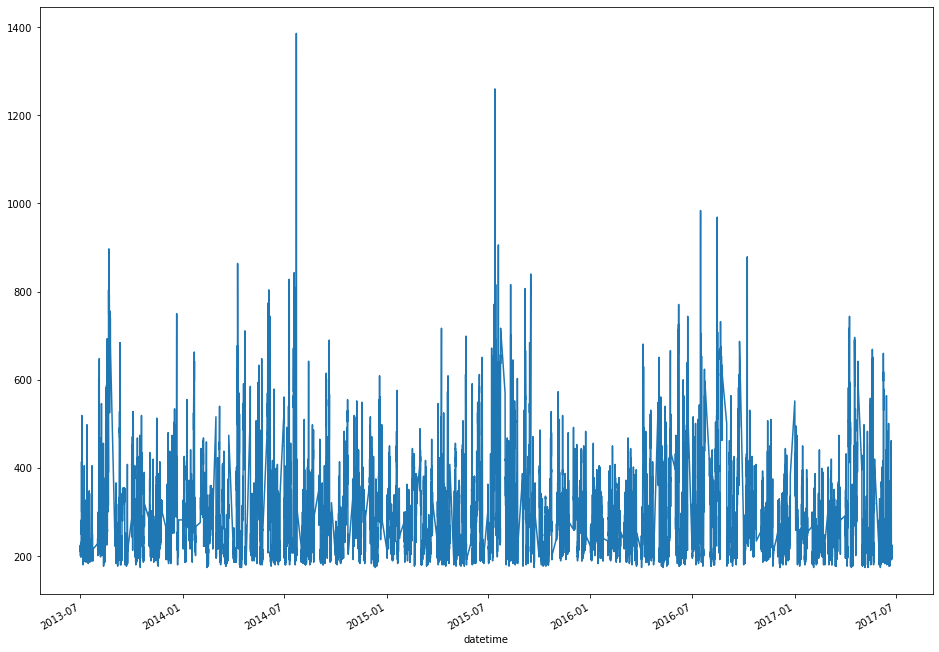

In [4]:
df['electricity_consumption'].plot(figsize = (16, 12))

In [5]:
adfuller(df['electricity_consumption'])

(-17.591909019062943,
 3.960099500324556e-30,
 38,
 26457,
 {'1%': -3.4305971910865534,
  '5%': -2.861649251241277,
  '10%': -2.566828151195233},
 258329.58108431558)

##### Time series is stationary

### Using datetime as variables

In [6]:
df['hour'] = df.index.hour
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.day_of_week
df

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption,hour,month,day_of_month,day_of_week
datetime,,,,,,,,,,,
2013-07-01 00:00:00,0,-11.4,-17.1,1003.0,571.910,0.0,216.0,0,7,1,0
2013-07-01 01:00:00,1,-12.1,-19.3,996.0,575.040,0.0,210.0,1,7,1,0
2013-07-01 02:00:00,2,-12.9,-20.0,1000.0,578.435,0.0,225.0,2,7,1,0
2013-07-01 03:00:00,3,-11.4,-17.1,995.0,582.580,0.0,216.0,3,7,1,0
2013-07-01 04:00:00,4,-11.4,-19.3,1005.0,586.600,0.0,222.0,4,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-06-23 19:00:00,34891,-0.7,-15.0,1009.0,51.685,0.0,225.0,19,6,23,4
2017-06-23 20:00:00,34892,-2.9,-11.4,1005.0,56.105,0.0,213.0,20,6,23,4
2017-06-23 21:00:00,34893,-1.4,-12.9,995.0,61.275,0.0,213.0,21,6,23,4


### Splitting dataset into predictor values and what we're looking for

In [7]:
X = df.iloc[:, [1, 2, 3, 4, 5, 7, 8, 9, 10]].values
X

array([[-1.140e+01, -1.710e+01,  1.003e+03, ...,  7.000e+00,  1.000e+00,
         0.000e+00],
       [-1.210e+01, -1.930e+01,  9.960e+02, ...,  7.000e+00,  1.000e+00,
         0.000e+00],
       [-1.290e+01, -2.000e+01,  1.000e+03, ...,  7.000e+00,  1.000e+00,
         0.000e+00],
       ...,
       [-1.400e+00, -1.290e+01,  9.950e+02, ...,  6.000e+00,  2.300e+01,
         4.000e+00],
       [-2.900e+00, -1.140e+01,  9.960e+02, ...,  6.000e+00,  2.300e+01,
         4.000e+00],
       [-2.100e+00, -1.140e+01,  1.009e+03, ...,  6.000e+00,  2.300e+01,
         4.000e+00]])

In [8]:
Y = df.iloc[:, 6].values
Y

array([216., 210., 225., ..., 213., 210., 210.])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# P1: Random Forest Regressor

### Grid search

In [14]:
grid = {'n_estimators' : [100, 200, 300, 400, 500, 600, 700], 'max_depth' : [7, 8, 9, 10], 'min_samples_split': [150, 250, 350, 500], 'min_samples_leaf': [40, 50, 60], 'max_features': [5, 6, 7, 8], 'random_state': [10]}
rfr = RandomForestRegressor()
test_scores = []
for g in ParameterGrid(grid):
    rfr.set_params(**g) #unpacking parameters from dictionary
    rfr.fit(X_train, Y_train) #fitting data
    test_scores.append(rfr.score(X_test, Y_test)) #getting score

best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.49361419449606747 {'random_state': 10, 'n_estimators': 400, 'min_samples_split': 150, 'min_samples_leaf': 40, 'max_features': 8, 'max_depth': 10}


In [42]:
rfr = RandomForestRegressor(random_state = 10, n_estimators = 400, min_samples_split = 500, min_samples_leaf = 75, max_features = 5, max_depth = 8)
rfr.fit(X_train, Y_train)
print(rfr.score(X_train, Y_train))
print(rfr.score(X_test, Y_test))

0.41202944920417184
0.38742171181679663


### Making predictions

In [27]:
train_prediction = rfr.predict(X_train)
test_prediction = rfr.predict(X_test)

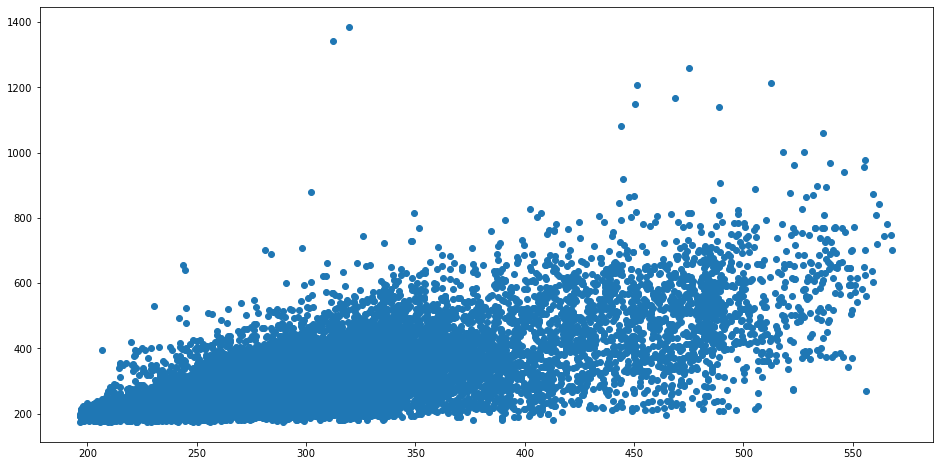

In [28]:
plt.rc("figure", figsize = (16, 8))
plt.scatter(train_prediction, Y_train);

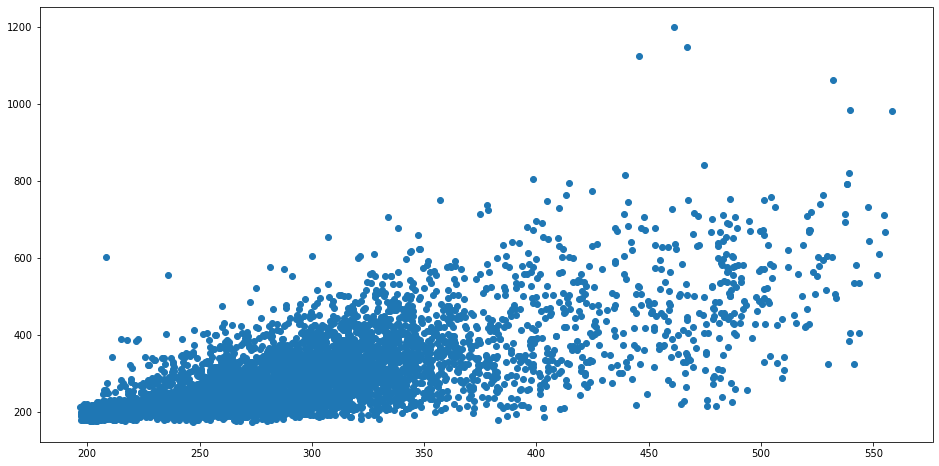

In [29]:
plt.scatter(test_prediction, Y_test);

### Checking which features are the most important

In [30]:
feature_importanceRFR = rfr.feature_importances_
sorted_index = np.argsort(feature_importanceRFR)[::-1] #sorting the index by descending order
x1 = range(len(feature_importanceRFR))
feature_names = df.drop(['ID', 'electricity_consumption'], axis = 1).columns.tolist()[:] #names are the same as names of collumns
labels = np.array(feature_names)[sorted_index]

<BarContainer object of 9 artists>

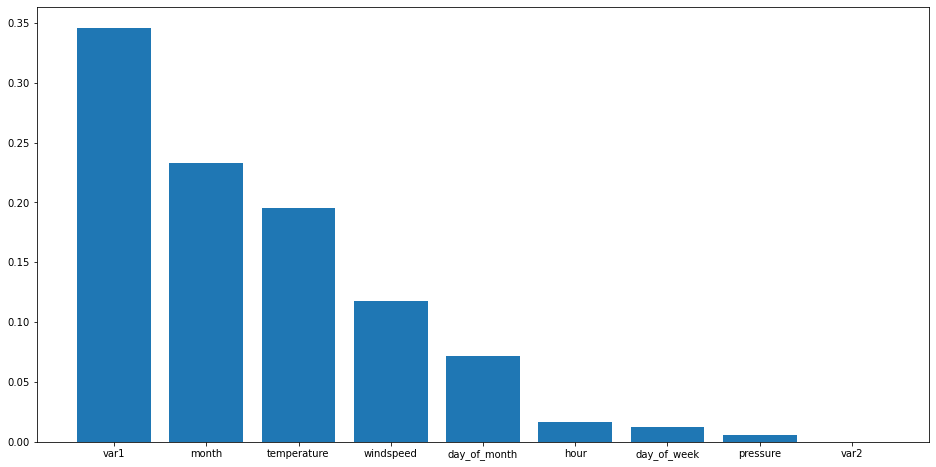

In [31]:
plt.bar(x1, feature_importanceRFR[sorted_index], tick_label = labels)

### Final forecast

In [19]:
df1 = pd.read_csv('test.csv', index_col = 'datetime', parse_dates = True)

#turning var2 into numbers
enc1 = OrdinalEncoder()
enc1.fit(df1[['var2']])
df1['var2'] = enc1.transform(df1[['var2']])

#datetime as variables
df1['hour'] = df1.index.hour
df1['month'] = df1.index.month
df1['day_of_month'] = df1.index.day
df1['day_of_week'] = df1.index.day_of_week

#X values for predictiom
X_pred = df1.iloc[:, 1:].values

#model
rfr = RandomForestRegressor(random_state = 10, n_estimators = 300, min_samples_split = 300, min_samples_leaf = 50, max_features = 5, max_depth = 10)
rfr.fit(X, Y)
prediction = rfr.predict(X_pred)

<AxesSubplot:xlabel='datetime'>

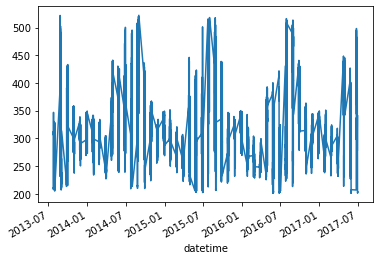

In [20]:
df1['electricity_consumption'] = prediction
df1['electricity_consumption'].plot()

### Saving predictions to file

In [21]:
df2 = pd.read_csv('sample_submission.csv')
df2['electricity_consumption'] = prediction
df2.set_index('ID', inplace = True)
df2.to_csv('sample_prediction.csv')

### Score: lower is better

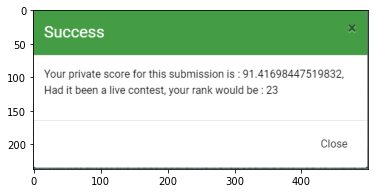

In [15]:
import matplotlib.image as mpimg
img = mpimg.imread('RandomForestResult.png')
imgplot = plt.imshow(img)
plt.show()

# P2: Gradient Boosted Regressor

### Grid search to tune parameters

In [112]:
grid = {'n_estimators' : [50, 75, 100], 'learning_rate': [0.1, 0.15, 0.2], 'min_samples_split': [250], 'min_samples_leaf': [50], \
    'max_depth' : [5], 'max_features': [4], 'subsample': [0.8], 'random_state': [10]}
GBR = GradientBoostingRegressor()
test_scores = []
for g in ParameterGrid(grid):
    GBR.set_params(**g) #unpacking parameters from dictionary
    GBR.fit(X_train, Y_train) #fitting data
    test_scores.append(GBR.score(X_test, Y_test)) #getting score

best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.5642524931055903 {'subsample': 0.8, 'random_state': 10, 'n_estimators': 100, 'min_samples_split': 250, 'min_samples_leaf': 50, 'max_features': 4, 'max_depth': 5, 'learning_rate': 0.2}


In [113]:
grid = {'n_estimators' : [100], 'learning_rate': [0.2], 'min_samples_split': [200, 250, 300], 'min_samples_leaf': [30, 40, 50, 60], \
    'max_depth' : [5], 'max_features': [4], 'subsample': [0.8], 'random_state': [10]}
GBR = GradientBoostingRegressor()
test_scores = []
for g in ParameterGrid(grid):
    GBR.set_params(**g) #unpacking parameters from dictionary
    GBR.fit(X_train, Y_train) #fitting data
    test_scores.append(GBR.score(X_test, Y_test)) #getting score

best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.5737007599740687 {'subsample': 0.8, 'random_state': 10, 'n_estimators': 100, 'min_samples_split': 200, 'min_samples_leaf': 30, 'max_features': 4, 'max_depth': 5, 'learning_rate': 0.2}


In [114]:
grid = {'n_estimators' : [100], 'learning_rate': [0.2], 'min_samples_split': [200], 'min_samples_leaf': [30], \
    'max_depth' : [5, 6, 7, 8], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9], 'subsample': [0.8], 'random_state': [10]}
GBR = GradientBoostingRegressor()
test_scores = []
for g in ParameterGrid(grid):
    GBR.set_params(**g) #unpacking parameters from dictionary
    GBR.fit(X_train, Y_train) #fitting data
    test_scores.append(GBR.score(X_test, Y_test)) #getting score

best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.6453190407020191 {'subsample': 0.8, 'random_state': 10, 'n_estimators': 100, 'min_samples_split': 200, 'min_samples_leaf': 30, 'max_features': 7, 'max_depth': 8, 'learning_rate': 0.2}


In [115]:
grid = {'n_estimators' : [100], 'learning_rate': [0.2], 'min_samples_split': [200], 'min_samples_leaf': [30], \
    'max_depth' : [8], 'max_features': [7], 'subsample': [0.6, 0.7, 0.8, 0.9], 'random_state': [10]}
GBR = GradientBoostingRegressor()
test_scores = []
for g in ParameterGrid(grid):
    GBR.set_params(**g) #unpacking parameters from dictionary
    GBR.fit(X_train, Y_train) #fitting data
    test_scores.append(GBR.score(X_test, Y_test)) #getting score

best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.6453190407020191 {'subsample': 0.8, 'random_state': 10, 'n_estimators': 100, 'min_samples_split': 200, 'min_samples_leaf': 30, 'max_features': 7, 'max_depth': 8, 'learning_rate': 0.2}


### Decreasing learning rate

In [119]:
GBR = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.1, min_samples_split = 200, min_samples_leaf = 30, max_depth = 8, max_features = 7, subsample = 0.8, random_state = 10)
GBR.fit(X_train, Y_train) #fitting data
print(GBR.score(X_test, Y_test))

0.6590818505147575


In [121]:
GBR = GradientBoostingRegressor(n_estimators = 800, learning_rate = 0.05, min_samples_split = 200, min_samples_leaf = 30, max_depth = 8, max_features = 7, subsample = 0.8, random_state = 10)
GBR.fit(X_train, Y_train) #fitting data
print(GBR.score(X_test, Y_test))

0.6676843399694897


### Final parameters for best model:
##### n_estimators = 800,
##### learning_rate = 0.05,
##### min_samples_split = 200,
##### min_samples_leaf = 30, 
##### max_depth = 8,
##### max_features = 7,
##### subsample = 0.8,
##### random_state = 10.

### Making predictions

In [122]:
train_prediction = GBR.predict(X_train)
test_prediction = GBR.predict(X_test)

In [10]:
GBR = GradientBoostingRegressor(n_estimators = 800, learning_rate = 0.01, min_samples_split = 300, min_samples_leaf = 50, max_depth = 10, max_features = 5, subsample = 0.8, random_state = 10)
GBR.fit(X_train, Y_train) #fitting data
print(GBR.score(X_test, Y_test))

0.6146437900615493


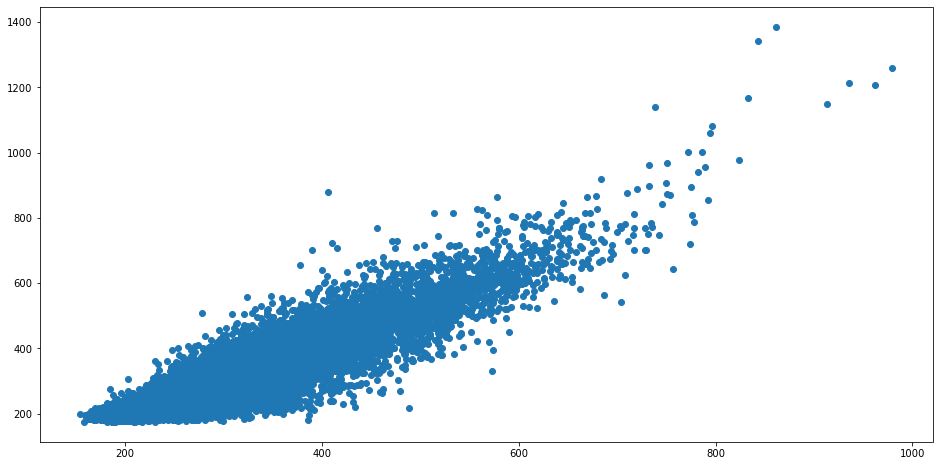

In [123]:
plt.rc("figure", figsize = (16, 8))
plt.scatter(train_prediction, Y_train);

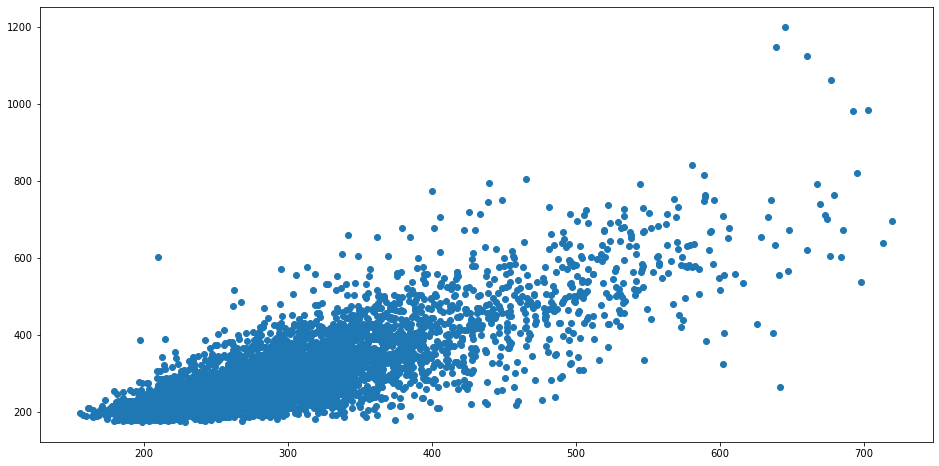

In [124]:
plt.scatter(test_prediction, Y_test);

### Finding most important features

In [125]:
feature_importanceGBR = GBR.feature_importances_
sorted_index = np.argsort(feature_importanceRFR)[::-1] #sorting the index by descending order
x1 = range(len(feature_importanceRFR))
feature_names = df.drop(['ID', 'electricity_consumption'], axis = 1).columns.tolist()[:] #names are the same as names of collumns
labels = np.array(feature_names)[sorted_index]

<BarContainer object of 9 artists>

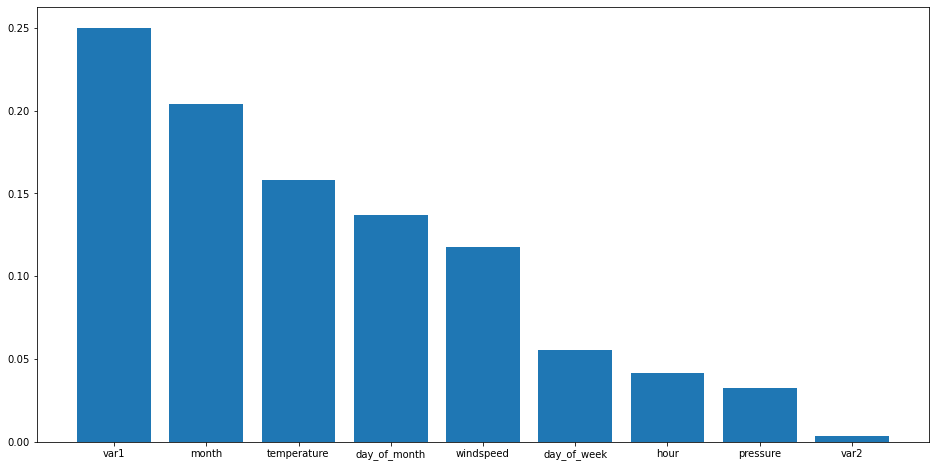

In [126]:
plt.bar(x1, feature_importanceGBR[sorted_index], tick_label = labels)

### Final forecast

In [10]:
df3 = pd.read_csv('test.csv', index_col = 'datetime', parse_dates = True)

#turning var2 into numbers
enc3 = OrdinalEncoder()
enc3.fit(df3[['var2']])
df3['var2'] = enc3.transform(df3[['var2']])

#datetime as variables
df3['hour'] = df3.index.hour
df3['month'] = df3.index.month
df3['day_of_month'] = df3.index.day
df3['day_of_week'] = df3.index.day_of_week

#X values for predictiom
X_pred = df3.iloc[:, 1:].values

#model
GBR = GradientBoostingRegressor(n_estimators = 800, learning_rate = 0.01, min_samples_split = 300, min_samples_leaf = 50, max_depth = 10, max_features = 5, subsample = 0.8, random_state = 10)
GBR.fit(X, Y)
prediction = GBR.predict(X_pred)

<AxesSubplot:xlabel='datetime'>

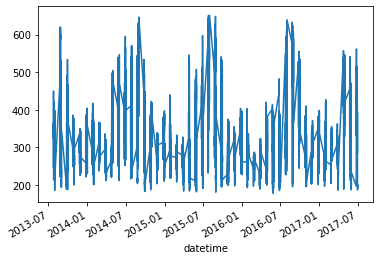

In [11]:
df3['electricity_consumption'] = prediction
df3['electricity_consumption'].plot()

### Saving prediction to file

In [12]:
df4 = pd.read_csv('sample_submission.csv')
df4['electricity_consumption'] = prediction
df4.set_index('ID', inplace = True)
df4.to_csv('sample_prediction_GBR.csv')

### Score: lower is better

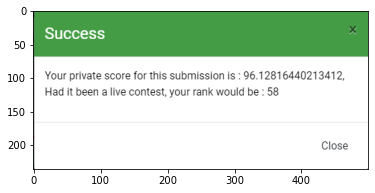

In [16]:
img = mpimg.imread('GBR.png')
imgplot = plt.imshow(img)
plt.show()